# Reto - Fase 1: Sistema dinámico SIR

Modelación de sistemas con ecuaciones diferenciales

Equipo 8:

- Juan Pablo Echeagaray González
- Francisco García Barrada
- Emmanuel Isaí Godínez Flores
- Emanuel Park Kim
- José Miguel Pérez Flores

Profesores:

- Dr. Abraham Benito Barragán Amigón
- Dr. María Dolores García Martínez
  
7 de noviembre del 2021

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Resolver el sistema de ecuaciones diferenciales: 
$$
\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S\\
\frac{dI}{dt}&= \beta\frac{I}{N}S-\gamma I\\
\frac{dR}{dt}&= \gamma I
\end{aligned}
$$

## Condiciones iniciales

In [12]:
N = 1_000_000 # Población total
t_0 = 0
t_f = 60
h = 0.1
n = int((t_f - t_0) / h)
t = np.linspace(t_0, t_f, n + 1)
init = [999_999, 1, 0]  # [S(0), I(0), R(0)]
beta = 1
gamma = 0.1

## Usando el método de Euler

In [13]:
# Inicializar listas que contendrán las aproximaciones
S = np.zeros(n + 1)
I = np.zeros(n + 1)
R = np.zeros(n + 1)
S[0] = init[0]
I[0] = init[1]
R[0] = init[2]

In [14]:
for i in range(n):
    S[i + 1] = S[i] + h * (- beta * I[i] * S[i] / N)
    I[i + 1] = I[i] + h * (beta * I[i] * S[i] / N - gamma * I[i])
    R[i + 1] = R[i] + h * (gamma * I[i])

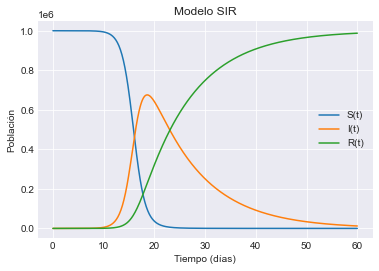

In [15]:
plt.plot(t, S, label='S(t)')
plt.plot(t, I, label='I(t)')
plt.plot(t, R, label='R(t)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Modelo SIR')
plt.legend()

### Respaldo de resultados

In [16]:
df_euler = pd.DataFrame(np.array([S, I, R]).T, columns=['S', 'I', 'R'], index=t)
df_euler.to_csv('data\\fase1\\euler.csv')

## Preguntas

**Pregunta 1**

Analizando el dataframe “output” encuentre el día en que el número de contagios es máximo ¿Después de cuántos días del inicio ocurre el máximo? Usando las ecuaciones diferenciales del modelo, encuentre una relación entre los parámetros del modelo válida para el valor de t correspondiente al máximo de la curva de infección.

In [17]:
max_inf = df_euler['I'].max()
day_inf = df_euler['I'].idxmax()
sus = df_euler['S'][day_inf]
print(f'El número máximo de infectados es {max_inf:.0f} al día {day_inf:.0f}')
print(f'El número de contagiados ese día es {sus:.0f}')

El número máximo de infectados es 675506 al día 19
El número de contagiados ese día es 95623


Dado que la derivada de $I(t)$ es:

\begin{equation}
    \frac{dI}{dt} = \beta \frac{I}{N} S - \gamma I
\end{equation}

Un extremo de la función estará en un tiempo dado cuando la expresión anterior sea igual a $0$, sabiendo esto, podemos inferir las condiciones necesarias para que se de el número máximo de contagios en la población:

\begin{gather*}
    0 = \beta \frac{I}{N} S - \gamma I \\
    \beta \frac{1}{N} S = \gamma \\
    S(t) = \frac{\gamma N}{\beta} \\
    S(t) = 100000
\end{gather*}

De aquí, sabemos que habrá un máximo de infectados cuando el número de susceptibles sea igual a la expresión anterior, para este problema, el número máximo de contagiados se dará cuando el número de susceptibles sea igual a $100000$.

El error que vemos en nuestra aplicación es introducido por el valor del paso $h$, en el límite cuando $h \rightarrow 0$, observaremos el valor calculado.

**Pregunta 2**

Analizando el dataframe “output” encuentre después de cuántos días el número de “susceptibles” se reduce a la mitad. Usando la ecuación diferencial que expresa la variación del número de susceptibles, encuentre de manera analítica una fórmula que exprese el tiempo t necesario para que el número de susceptibles sea la mitad del valor incial en función de $\beta$

In [18]:
max_sup = df_euler['S'].max()
half = 0.5 * max_sup
# Find the day where S reaches half of the maximum
day_sup = df_euler['S'].loc[df_euler['S'] >= half].idxmin()
print(f'El número de susceptibles se reduce a la mitad (aproximadamente) el día {day_sup:.0f}')

El número de susceptibles se reduce a la mitad (aproximadamente) el día 16


**Pregunta 3**

Estudie la dinámica del contagio variando los parámetros $\beta$ y $\gamma$. Empiece con $\gamma$ = 0.1 constante
cambiando β (que representa la ‘fuerza’ de la infeccion):

- $\beta$ = 0.1 365 días
- $\beta$ = 0.3 365 días
- $\beta$ = 0.7 60 días
- $\beta$ = 0.9 60 días
- $\beta$ = 1.2 60 días

Comente acerca de los cambios que se observan en las curvas. Encuentre una relación entre $\beta$ y $\gamma$ necesaria para que ocurra la epidemia. Para que haya una epidemia la fuerza de infección ($\beta$) debe ser suficientemente alta por un tiempo suficientemente largo ($\gamma$ suficientemente bajo) de manera que se pueda transmitir el agente patógeno. A partir de este estudio se puede definir el coeficiente $R_0$ de la infección.

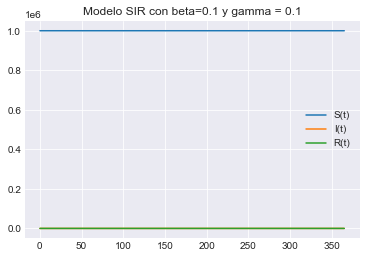

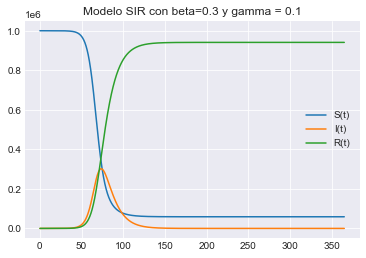

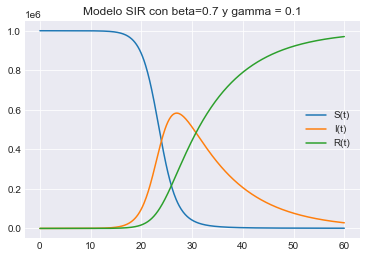

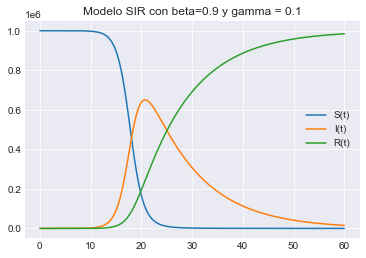

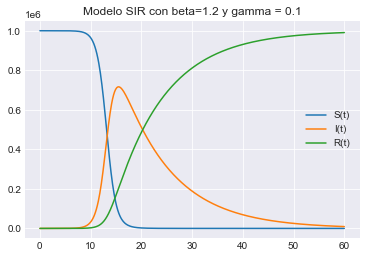

In [19]:
gamma = 0.1
beta_vals = [0.1, 0.3, 0.7, 0.9, 1.2]
days = [365, 365, 60, 60, 60]
t_0 = 0
h = 0.1

for i in range(len(beta_vals)):
    beta = beta_vals[i]
    t_f = days[i]
    n = int((t_f - t_0) / h)
    t = np.linspace(t_0, t_f, n)

    # Inicializar listas que contendrán las aproximaciones
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = init[0]
    I[0] = init[1]
    R[0] = init[2]

    for i in range(n - 1):
        S[i + 1] = S[i] + h * (- beta * I[i] * S[i] / N)
        I[i + 1] = I[i] + h * (beta * I[i] * S[i] / N - gamma * I[i])
        R[i + 1] = R[i] + h * (gamma * I[i])

    plt.plot(t, S, label=f'S(t)')
    plt.plot(t, I, label=f'I(t)')
    plt.plot(t, R, label=f'R(t)')
    plt.title(f'Modelo SIR con beta={beta} y gamma = {gamma}')
    plt.legend()
    plt.show()

**Pregunta 4**

Después, con $\beta$ = 1 varíe el valor de $\gamma$:

- $\gamma$ = 0.025 60 días
- $\gamma$ = 0.2 60 días
- $\gamma$ = 0.5 60 días
- $\gamma$ = 1 365 días

Comente acerca de los cambios que se observan en las curvas. Encuentre una relación entre $\beta$ y $\gamma$ necesaria para que ocurra la epidemia. Para que haya una epidemia la fuerza de infección ($\beta$) debe ser suficientemente alta por un tiempo suficientemente largo ($\gamma$ suficientemente bajo) de manera que se pueda transmitir el agente patógeno. A partir de este estudio se puede definir el coeficiente R0 de la infección.

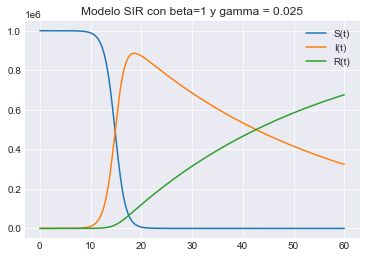

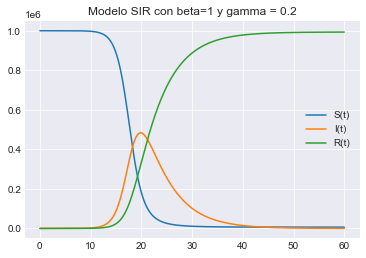

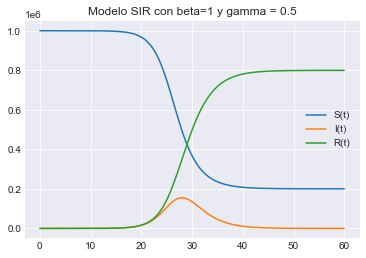

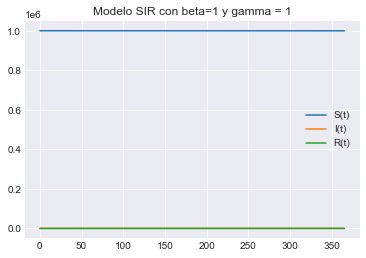

In [20]:
beta = 1
gamma_vals = [0.025, 0.2, 0.5, 1]
days = [60, 60, 60, 365]
t_0 = 0
h = 0.1

for i in range(len(gamma_vals)):
    gamma = gamma_vals[i]
    t_f = days[i]
    n = int((t_f - t_0) / h)
    t = np.linspace(t_0, t_f, n)

    # Inicializar listas que contendrán las aproximaciones
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = init[0]
    I[0] = init[1]
    R[0] = init[2]

    for i in range(n - 1):
        S[i + 1] = S[i] + h * (- beta * I[i] * S[i] / N)
        I[i + 1] = I[i] + h * (beta * I[i] * S[i] / N - gamma * I[i])
        R[i + 1] = R[i] + h * (gamma * I[i])

    plt.plot(t, S, label=f'S(t)')
    plt.plot(t, I, label=f'I(t)')
    plt.plot(t, R, label=f'R(t)')
    plt.title(f'Modelo SIR con beta={beta} y gamma = {gamma}')
    plt.legend()
    plt.show()